[Pipeline] ............ (step 1 of 1) Processing linear, total=   0.7s


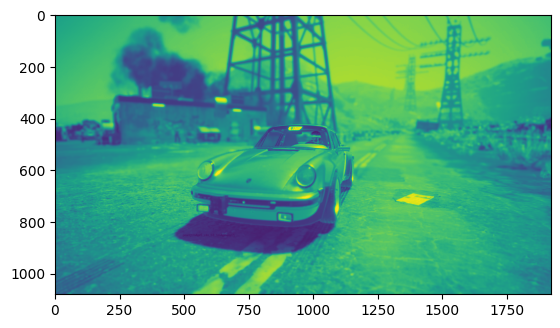

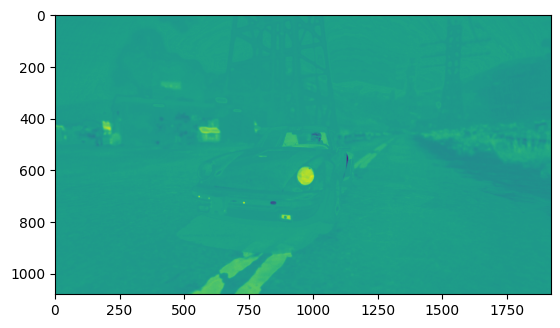

In [23]:
from cv2 import IMREAD_UNCHANGED, imread
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

car1 = imread("car1.png", IMREAD_UNCHANGED)
car2 = imread("car2.png", IMREAD_UNCHANGED)

car1_complex = car1.astype(np.int16)
car2_complex = car2.astype(np.int16)

pipeline = Pipeline(
    (
        (
            "linear",
            Ridge(),
        ),
    ),
    verbose=True,
)

size = 3


def conv(image: np.ndarray):
    ret = np.zeros((size**2,) + image.shape)
    idx = 0
    for dy in range(-size // 2 + 1, size // 2 + 1):
        for dx in range(-size // 2 + 1, size // 2 + 1):
            ret[
                idx,
                max(dy, 0) : max(dy, 0) + image.shape[0] - abs(dy),
                max(dx, 0) : max(dx, 0) + image.shape[1] - abs(dx),
            ] = image[
                max(-dy, 0) : max(-dy, 0) + image.shape[0] - abs(dy),
                max(-dx, 0) : max(-dx, 0) + image.shape[1] - abs(dx),
            ]
            idx += idx
    return ret.transpose((1, 2, 0)).reshape((-1, size**2))


pipeline.fit(
    np.array([np.concatenate(e) for e in zip(conv(car1_complex[..., 1]), conv(car2_complex[..., 1]))]),
    car1_complex[..., 0].reshape(-1),
)

plt.figure()
plt.imshow(car1_complex[..., 0])
plt.figure()
plt.imshow(
    pipeline.predict(
        np.array([np.concatenate(e) for e in zip(conv(car1_complex[..., 1]), conv(car2_complex[..., 1]))])
    ).reshape((1080, 1920))
)